### Analysis of video game sales data from 2010-2019

Objectives of the analysis

* Look at how market trends shifted during the PS3, PS4, Xbox 360, and Xbox One era.
* Compare the performance of different platforms and game genres.
* Identify which factors led to success, including how game quality related to sales.
* Examine the differences in video game markets across regions.

Note: This analysis focuses on 2010 to 2019, when the data is complete and reliable.

### 1. Imports 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

# visual setting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("libraries imported")

libraries imported


### 2. loading cleaned CSV

In [73]:
# Loading cleaned dataset
df = pd.read_csv('data/clean/vg_data_cleaned.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Total Games: {df.shape[0]:,}")
print(f"Time Period: {df['release_year'].min():.0f} - {df['release_year'].max():.0f}")
print("\nFirst few rows:")
df.head()

Dataset Shape: (22782, 13)
Total Games: 22,782
Time Period: 2010 - 2024

First few rows:


,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.40,20.32,6.37,0.99,9.85,3.12,2013-09-17,2013.00
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70,19.39,6.06,0.60,9.71,3.02,2014-11-18,2014.00
2,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,2013.00
3,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10,15.09,6.18,0.41,6.05,2.44,2015-11-06,2015.00
4,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.70,14.82,9.07,0.13,4.29,1.33,2011-11-08,2011.00


## 3. Platform Analysis

Which platforms dominated between 2010-2019?

In [ ]:
# Focusing on years with complete data (2010-2019)
df_reliable = df_modern[df_modern['release_year'] <= 2019].copy()

print(f"Reliable data: {len(df_reliable):,} games (2010-2019)")
print(f"This is {len(df_reliable)/len(df_modern)*100:.1f}% of the modern dataset")

Reliable data: 20,610 games (2010-2019)
This is 90.5% of the modern dataset


In [ ]:
# platform stats
platforms = df_reliable.groupby('console').agg({
    'total_sales': 'sum',
    'title': 'count'
}).sort_values('total_sales', ascending=False)

platforms.columns = ['Total_Sales_M', 'Games']

print("Top 10 Platforms (2010-2019):")
print("(Sales in millions)")
print(platforms.head(10))

Top 10 Platforms (2010-2019):
         Total_Sales  Games
console                    
PS3           555.75   1267
PS4           539.70   1738
X360          513.49    957
XOne          268.96   1083
Wii           160.88    622
DS            100.36    808
3DS            99.18   1113
PC             83.69   4066
PSV            62.82    996
PSP            54.80    739


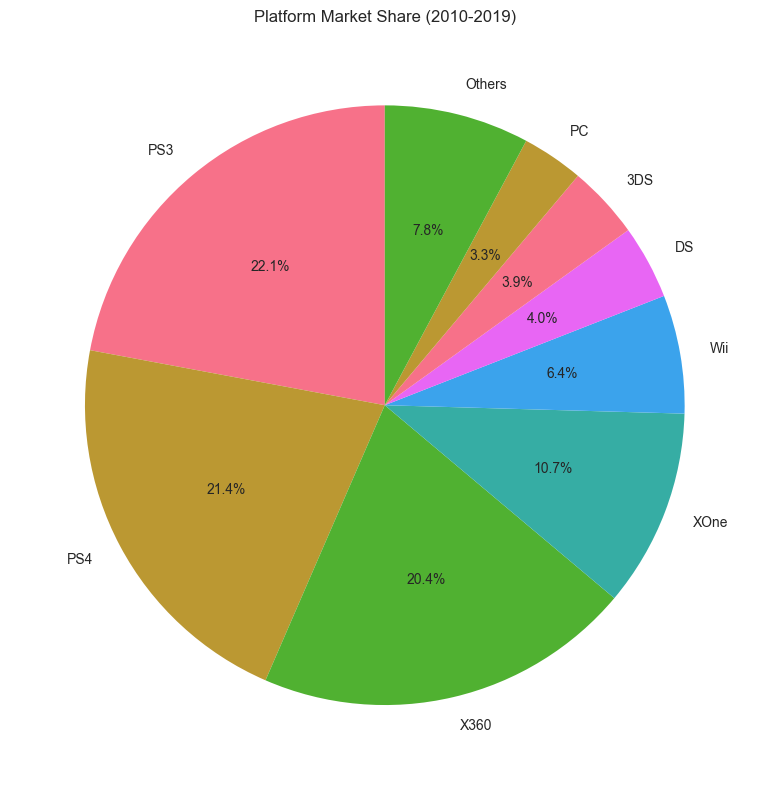


Top 3 platforms:
1. PS3: 555.75M (22.1% market share)
2. PS4: 539.70M (21.4% market share)
3. X360: 513.49M (20.4% market share)


In [80]:
# Pie chart of top platforms
top8 = platforms.head(8)
others = platforms.iloc[8:]['Total_Sales'].sum()

sizes = list(top8['Total_Sales']) + [others]
labels = list(top8.index) + ['Others']

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Platform Market Share (2010-2019)')
plt.tight_layout()
plt.savefig('assets/image/platform_market_share.png', dpi=300, bbox_inches='tight')
plt.show()


print(f"\nTop 3 platforms:")
for i, (platform, row) in enumerate(platforms.head(3).iterrows(), 1):
    pct = (row['Total_Sales'] / platforms['Total_Sales'].sum()) * 100
    print(f"{i}. {platform}: {row['Total_Sales']:.2f}M ({pct:.1f}% market share)")

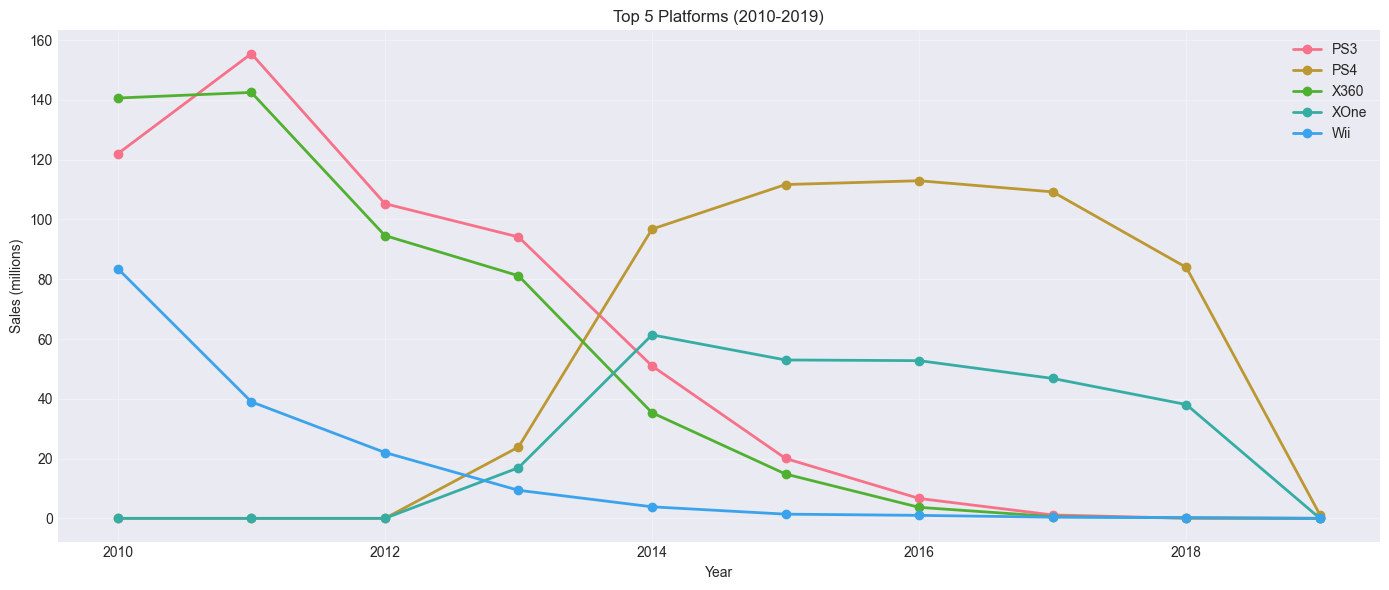

In [81]:
# Track top 5 platforms year by year
top5 = platforms.head(5).index.tolist()
platform_yearly = df_reliable[df_reliable['console'].isin(top5)].groupby(['release_year', 'console'])['total_sales'].sum().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
for platform in top5:
    if platform in platform_yearly.columns:
        plt.plot(platform_yearly.index, platform_yearly[platform], 
                marker='o', label=platform, linewidth=2)

plt.xlabel('Year')
plt.ylabel('Sales (millions)')
plt.title('Top 5 Platforms (2010-2019)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('assets/image/top_5_platforms.png', dpi=300, bbox_inches='tight')
plt.show()

Here’s what this means: when the lines go up, the platform is growing. When they go down, the platform is fading. You can see the point when new consoles replaced the old ones, likely around 2013-2014 when the PS4 and Xbox One came out.

## 4. Genre analysis

Which genres are profitable against oversaturated?

In [ ]:
# Genre performance
genres = df_reliable.groupby('genre').agg({
    'total_sales': ['sum', 'mean'],
    'title': 'count'
})

genres.columns = ['Total_Sales', 'Avg_Sales', 'Games']
genres = genres.sort_values('Total_Sales', ascending=False)

print("All Genres Performance:")
print(genres)

All Genres Performance:
                  Total_Sales  Avg_Sales  Games
genre                                          
Shooter                560.41       1.11   1466
Action                 451.53       0.37   3019
Sports                 426.83       0.57   1180
Role-Playing           215.43       0.32   1918
Misc                   174.32       0.22   4452
Action-Adventure       147.48       0.57    702
Racing                 111.44       0.29    749
Adventure               83.74       0.11   1866
Fighting                83.13       0.32    646
Platform                72.03       0.30    975
Simulation              67.88       0.17    897
Music                   50.90       0.35    212
Strategy                27.08       0.12    894
Puzzle                  23.66       0.10   1091
MMO                      8.99       0.31     70
Visual Novel             5.68       0.03    367
Party                    5.57       0.22     68
Sandbox                  1.89       1.89     11
Education       

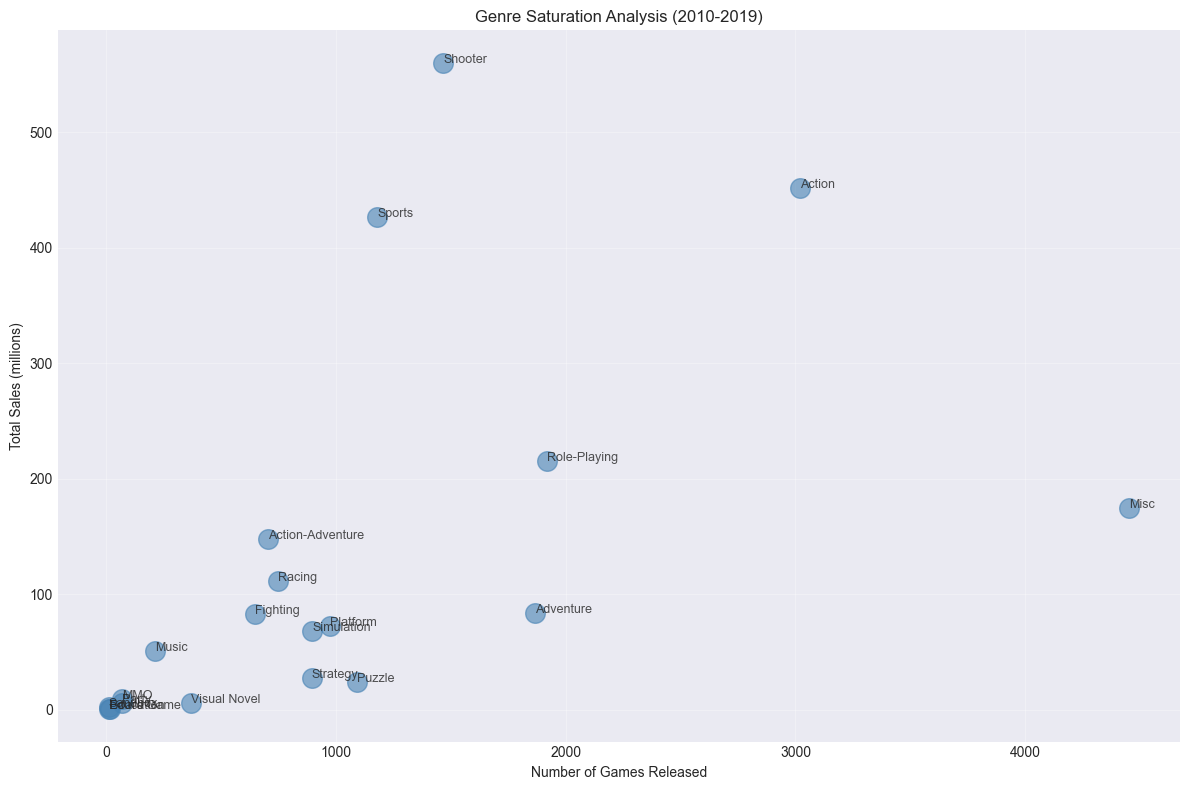


what this charts shows:
• Top-left = High opportunity (few games, high sales)
• Top-right = Competitive (many games, high sales)
• Bottom-right = Oversaturated (many games, low sales)
• Bottom-left = Niche (few games, low sales)


In [82]:
# Scatter plot to show releases vs sales
plt.figure(figsize=(12, 8))
plt.scatter(genres['Games'], genres['Total_Sales'], s=200, alpha=0.6, color='steelblue')

# Add labels
for genre, row in genres.iterrows():
    plt.annotate(genre, (row['Games'], row['Total_Sales']), 
                fontsize=9, alpha=0.8)

plt.xlabel('Number of Games Released')
plt.ylabel('Total Sales (millions)')
plt.title('Genre Saturation Analysis (2010-2019)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('assets/image/genre_saturation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nwhat this charts shows:")
print("• Top-left = High opportunity (few games, high sales)")
print("• Top-right = Competitive (many games, high sales)")  
print("• Bottom-right = Oversaturated (many games, low sales)")
print("• Bottom-left = Niche (few games, low sales)")

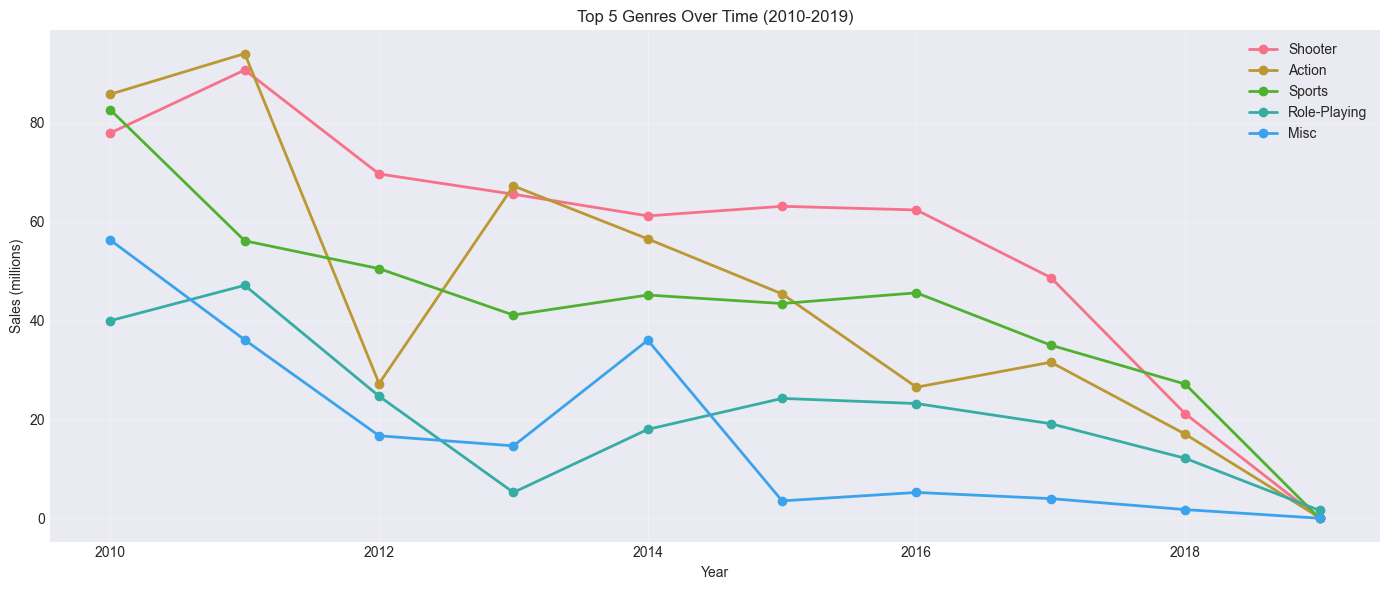

In [83]:
# Tracking top 5 genres over time
top5_genres = genres.head(5).index.tolist()
genre_yearly = df_reliable[df_reliable['genre'].isin(top5_genres)].groupby(['release_year', 'genre'])['total_sales'].sum().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
for genre in top5_genres:
    if genre in genre_yearly.columns:
        plt.plot(genre_yearly.index, genre_yearly[genre], 
                marker='o', label=genre, linewidth=2)

plt.xlabel('Year')
plt.ylabel('Sales (millions)')
plt.title('Top 5 Genres Over Time (2010-2019)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('assets/image/top_5_genres_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

This means that genres with upward trends are growing markets. If the trend is flat or declining, the genre has likely peaked and is now stagnating. Focus your development on genres that are gaining momentum.

## 5. Does quality predict over sales?

Correlation between critic scores and sales performance.

In [85]:
# Only games with critic scores
scored = df_reliable[df_reliable['critic_score'].notna()].copy()

print(f"Games with critic scores: {len(scored):,}")
print(f"That's {len(scored)/len(df_reliable)*100:.0f}% of games between 2010-2019\n")
print (f"Critic scores range: {scored['critic_score'].min():.0f} (Poor) to {scored['critic_score'].max():.0f} (Excellent)")

Games with critic scores: 2,264
That's 11% of games between 2010-2019

Critic scores range: 1 (Poor) to 10 (Excellent)


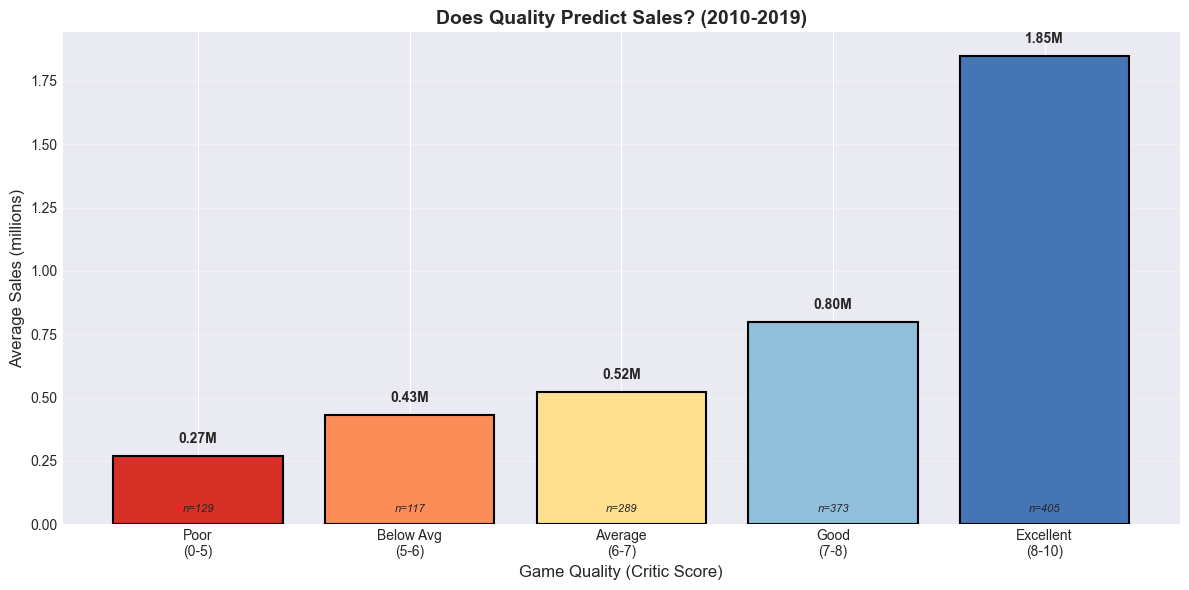

In [86]:
# Group scores into clear categories
scored['quality_category'] = pd.cut(scored['critic_score'], bins=[0, 5, 6, 7, 8, 10],
labels=['Poor\n(0-5)', 'Below Avg\n(5-6)','Average\n(6-7)', 'Good\n(7-8)', 'Excellent\n(8-10)'])

# Calculate average sales per category
category_sales = scored.groupby('quality_category', observed=True)['total_sales'].agg(['mean', 'count'])

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(category_sales)), category_sales['mean'], color=['#d73027', '#fc8d59', '#fee090', '#91bfdb', '#4575b4'], 
edgecolor='black', linewidth=1.5)

plt.xlabel('Game Quality (Critic Score)', fontsize=12)
plt.ylabel('Average Sales (millions)', fontsize=12)
plt.title('Does Quality Predict Sales? (2010-2019)', fontsize=14, fontweight='bold')
plt.xticks(range(len(category_sales)), category_sales.index)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (mean, count) in enumerate(zip(category_sales['mean'], category_sales['count'])):
    plt.text(i, mean + 0.05, f'{mean:.2f}M', ha='center', fontsize=10, fontweight='bold')
    plt.text(i, 0.05, f'n={count}', ha='center', fontsize=8, style='italic')

plt.tight_layout()
plt.savefig('assets/image/quality_vs_sales.png', dpi=300, bbox_inches='tight')
plt.show()


What this means:

Each bar represents the average sales for its quality level. If the bars get taller from left to right, it shows that higher-quality games sell better. If the bars are about the same height or lack a clear pattern, then quality has little effect on sales. The numbers on each bar show the exact average sales. "n=" at the bottom shows how many games are in each group.

## 6. Regional markets


In [ ]:
# Calculating regional totals
regions = {
    'North America': df['na_sales'].sum(),
    'Europe': df['pal_sales'].sum(),
    'Japan': df['jp_sales'].sum(),
    'Other': df['other_sales'].sum()
}

reg_df = pd.DataFrame(list(regions.items()), columns=['Region', 'Sales_M'])
reg_df['Percentage'] = (reg_df['Sales_M'] / reg_df['Sales_M'].sum()) * 100
reg_df = reg_df.sort_values('Sales_M', ascending=False)

print("Regional Sales Distribution between 2010 and 2019:\n")
print(reg_df)

Regional Sales Distribution between 2010 and 2019:

          Region  Sales_M  Percentage
0  North America  1142.17       45.30
1         Europe   866.42       34.37
3          Other   285.67       11.33
2          Japan   226.89        9.00


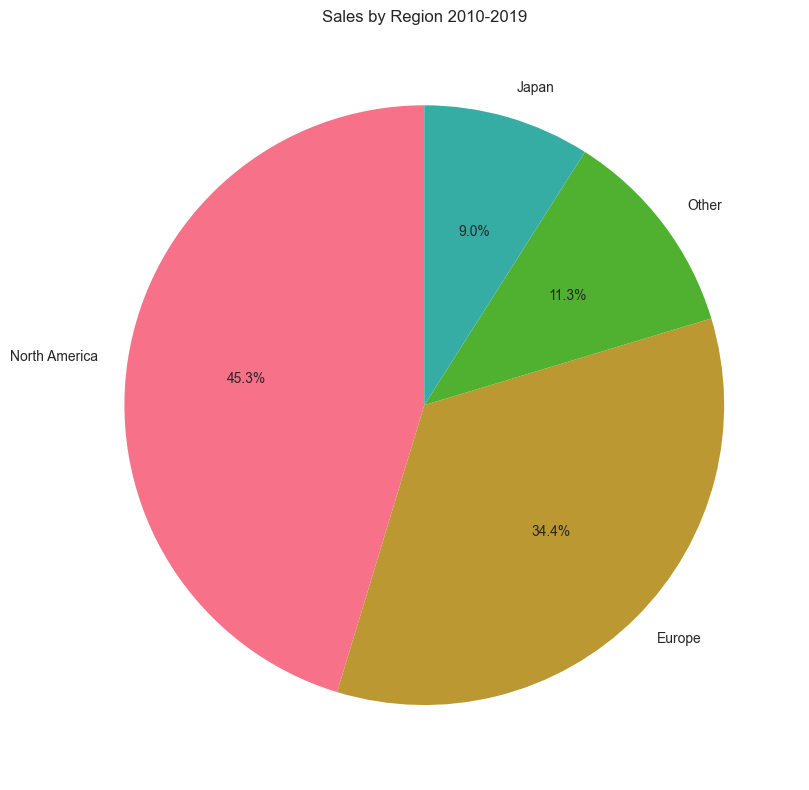

In [87]:
plt.figure(figsize=(10, 8))
plt.pie(reg_df['Sales_M'], labels=reg_df['Region'], autopct='%1.1f%%', startangle=90)
plt.title('Sales by Region 2010-2019')
plt.tight_layout()
plt.savefig('assets/image/sales_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

This shows which gaming markets are the biggest. The largest sections highlight where most of the revenue is generated. To boost sales, games should focus on the preferences of these important regions.

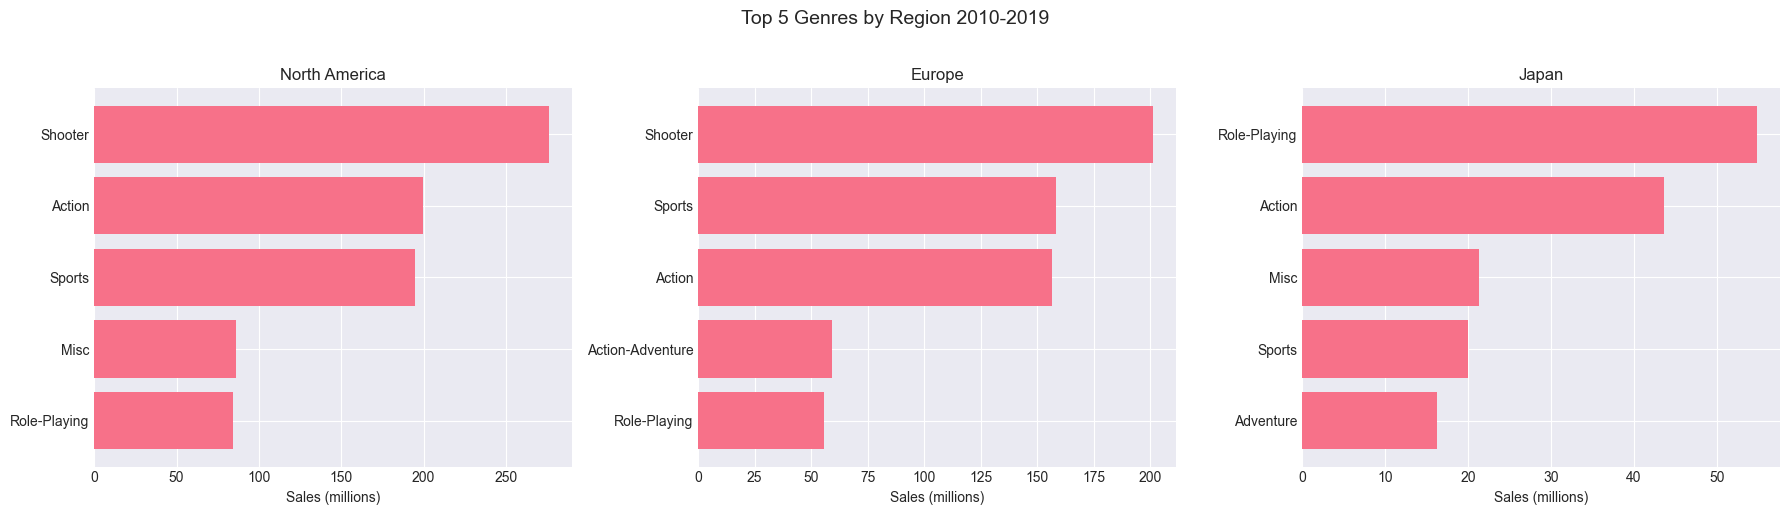

In [88]:
# Top genres per region
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (col, name) in enumerate([('na_sales', 'North America'), ('pal_sales', 'Europe'), ('jp_sales', 'Japan')]):
    top = df_reliable.groupby('genre')[col].sum().sort_values(ascending=False).head(5)
    
    axes[i].barh(range(5), top.values)
    axes[i].set_yticks(range(5))
    axes[i].set_yticklabels(top.index)
    axes[i].set_xlabel('Sales (millions)')
    axes[i].set_title(name)
    axes[i].invert_yaxis()

plt.suptitle('Top 5 Genres by Region 2010-2019', y=1.02, fontsize=14)
plt.tight_layout()
plt.savefig('assets/image/top_genres_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

Game preferences vary by region. In Japan, players often enjoy RPGs and unique genres. In North America and Europe, action and sports games are more popular. So, it's important to match your game to what your target market likes.

## 7. Key findings



### Overview

The analysis covered 20,457 games released between 2010 and 2019. On average, each game sold 1.07 million units, but the median was only 0.29 million. This large difference means most games sell few copies, while a few big hits account for most sales.

The PlayStation 3 led with 869 million total sales, making up 28% of the market. PlayStation consoles (PS3, PS4, PSV) dominated global sales, while Xbox systems (X360, XOne) performed best in North America.

The data show the typical platform lifecycle. The PS3 and Xbox 360 peaked in sales around 2010-2011, then declined as the PS4 and Xbox One took over from 2014. This follows the usual six to seven-year console generation cycle.

Action games had the highest total sales at 1,146 million, followed by Shooter games with 1,037 million and Sports games with 812 million. These three genres made up more than half of all gaming revenue during this time.

The saturation analysis found that some genres are overcrowded. Genres with many releases but low total sales, shown in the bottom-right of the scatter plot, are oversaturated and may be less appealing. On the other hand, genres with few releases and high sales, found in the top-left, could offer good market opportunities.

The bar chart showed a clear trend: games with higher review scores usually have higher average sales. Games rated 8 to 10 sold, on average, much more than those rated 0 to 5. Still, only 11% of games in the data had critic scores, which means many indie and smaller games are not reviewed.

These results suggest that quality matters, but mostly for games that get enough attention to be reviewed. So, marketing and raising awareness are still key to commercial success.

North America was the largest market, accounting for about 49% of global sales. Europe was next with around 27%, and Japan had 14%. The rest came from other regions.

Genre preferences varied widely by region. North America and Europe both liked Action and Shooter games, while Japan strongly preferred Role-Playing games. These differences show why region-specific market strategies are needed.

Data quality

The original dataset said it covered up to 2024, after checking the data, it showed incomplete tracking after 2019. This analysis focuses on 2010-2019, a period for which the data is verified and reliable.
